# WITH SEABORN

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Box and Swarm Plots in kill data
1. Most dangerous cities
1. Most dangerous states
1. Having mental ilness or not for killed people
1. Threat types
1. Flee types
<br>

## read data

if didn't work you can use this parameters: encoding="windows-1252"

In [2]:
df = pd.read_csv("PoliceKillingsUS.csv", encoding="windows-1252")
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [3]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,2535.0,NaN,NaN,NaN,1445.731755,794.25949,3.0,768.5,1453.0,2126.5,2822.0
name,2535,2481,TK TK,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,2535,879,24/01/17,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
manner_of_death,2535,2,shot,2363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
armed,2526,68,gun,1398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,2458.0,NaN,NaN,NaN,36.60537,13.030774,6.0,26.0,34.0,45.0,91.0
gender,2535,2,M,2428,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,2340,6,W,1201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,2535,1417,Los Angeles,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,2535,51,CA,424,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


## Shape

In [5]:
df.shape

(2535, 14)

## 1a: Box plot of age in both genders separeted by manner of death.

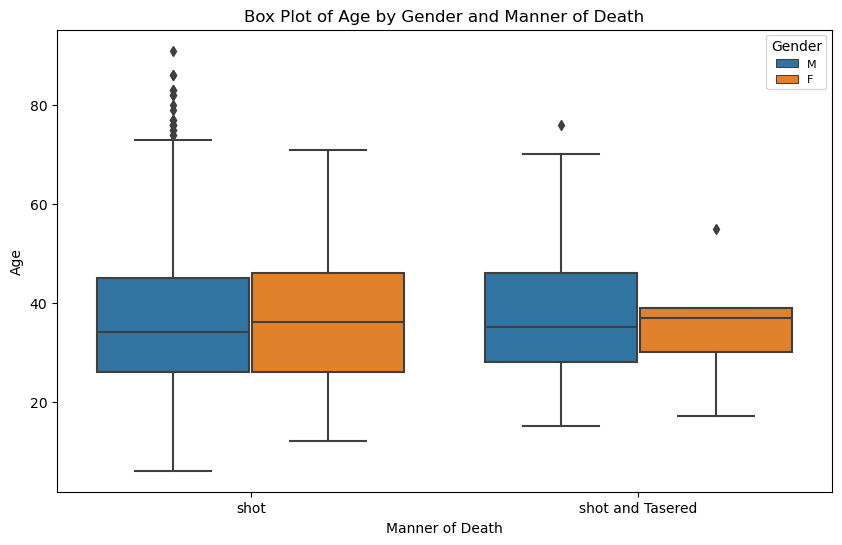

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='manner_of_death', y='age', hue='gender', data=df)


plt.title('Box Plot of Age by Gender and Manner of Death')
plt.xlabel('Manner of Death')
plt.ylabel('Age')


plt.legend(title='Gender', fontsize=8, title_fontsize=10, loc='upper right')

plt.show()

#### INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

In [7]:
df.dropna(inplace=True)
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,2805,Aries Clark,25/07/17,shot,undetermined,16.0,M,B,Marion,AR,False,undetermined,Not fleeing,False
2523,2808,Kesharn K. Burney,26/07/17,shot,vehicle,25.0,M,B,Dayton,OH,False,attack,Car,False
2525,2820,Deltra Henderson,27/07/17,shot,gun,39.0,M,B,Homer,LA,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


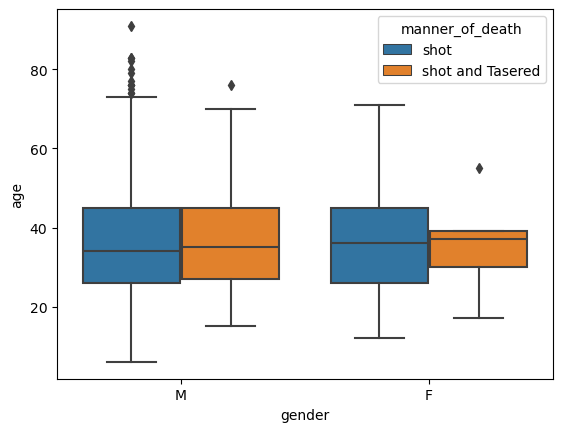

In [8]:
# with seaborn
sns.boxplot(data = df, x = "gender", y = "age", hue='manner_of_death');

## 1b: Swarm Plot 

#### INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

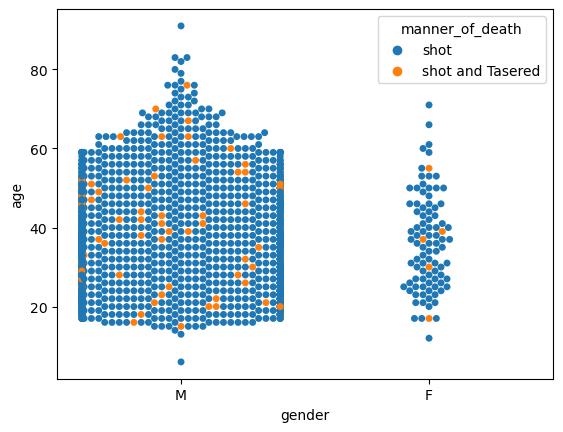

In [9]:
# with seaborn
#plt.figure(figsize = (6,4))
sns.swarmplot(data = df, x = 'gender', y = 'age', hue = 'manner_of_death');

## 2: Plot 12 most dangerous cities

In [10]:
top_12_cities = pd.DataFrame(df['city'].value_counts().head(12))
top_12_cities

,count
city,
Los Angeles,35
Phoenix,28
Houston,24
Chicago,22
Austin,18
Las Vegas,17
Columbus,16
Miami,15
San Antonio,15


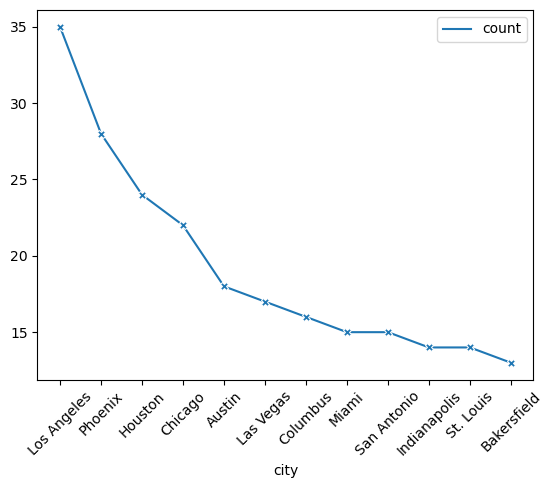

In [11]:
sns.lineplot(data = top_12_cities,marker = 'X')
plt.xticks(rotation=45)
plt.show()

In [12]:
counts = top_12_cities['count'].values
counts

array([35, 28, 24, 22, 18, 17, 16, 15, 15, 14, 14, 13], dtype=int64)

In [13]:
top_12_cities.index

Index(['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Austin', 'Las Vegas',
       'Columbus', 'Miami', 'San Antonio', 'Indianapolis', 'St. Louis',
       'Bakersfield'],
      dtype='object', name='city')

In [14]:
# with seaborn
plt.figure(figsize = (8,5))
ax = sns.barplot(data = top_12_cities, x = 'city', y = 'count')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+0.2));

ValueError: Could not interpret input 'city'

<Figure size 800x500 with 0 Axes>

In [15]:
df['city'].value_counts().nlargest(12)

city
Los Angeles     35
Phoenix         28
Houston         24
Chicago         22
Austin          18
Las Vegas       17
Columbus        16
Miami           15
San Antonio     15
Indianapolis    14
St. Louis       14
Bakersfield     13
Name: count, dtype: int64

In [37]:
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,2805,Aries Clark,25/07/17,shot,undetermined,16.0,M,B,Marion,AR,False,undetermined,Not fleeing,False
2523,2808,Kesharn K. Burney,26/07/17,shot,vehicle,25.0,M,B,Dayton,OH,False,attack,Car,False
2525,2820,Deltra Henderson,27/07/17,shot,gun,39.0,M,B,Homer,LA,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


## 3: Plot 20 most dangerous states

In [18]:
top_20_states = df['state'].value_counts().nlargest(20)
top_20_states

state
CA    366
TX    200
FL    136
AZ    105
OH     70
NC     66
OK     65
CO     63
GA     61
MO     58
TN     56
IL     56
WA     51
LA     47
AL     45
PA     45
NY     43
VA     43
WI     42
NM     41
Name: count, dtype: int64

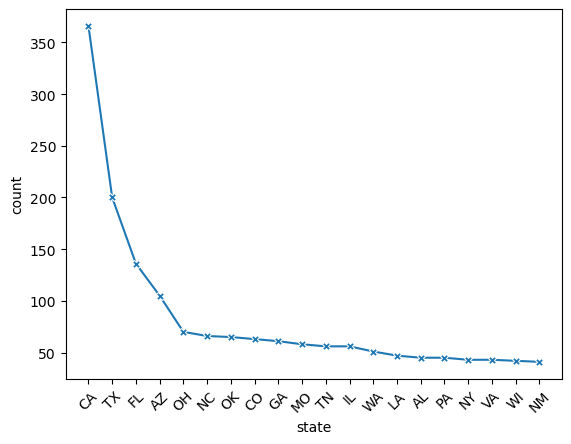

In [19]:
sns.lineplot(data = top_20_states, marker = 'X')
plt.xticks(rotation=45)
plt.show()

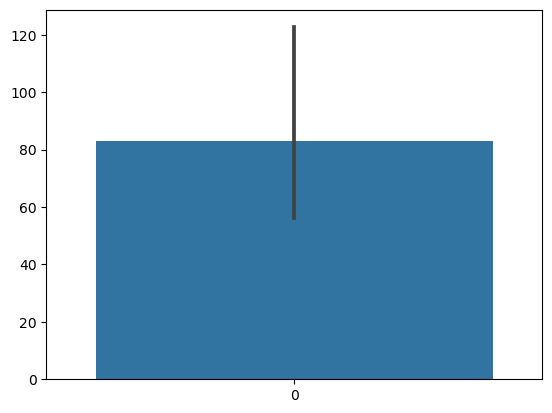

In [20]:
sns.barplot(data = top_20_states);

## 4: Plot Having mental ilness or not for killed people

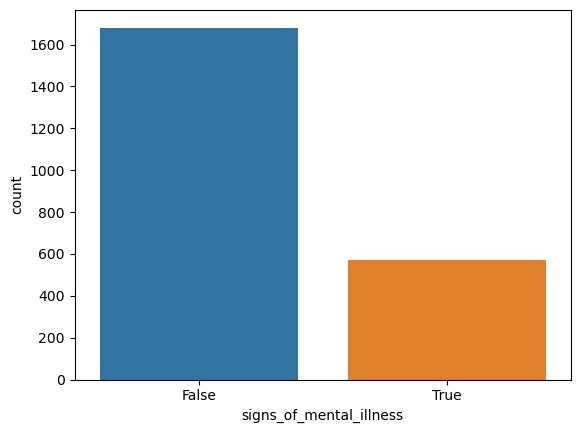

In [23]:
sns.countplot(data = df, x = 'signs_of_mental_illness')
plt.show()

In [24]:
df.groupby('signs_of_mental_illness').size()

signs_of_mental_illness
False    1681
True      573
dtype: int64

In [25]:
df['signs_of_mental_illness'].value_counts()

signs_of_mental_illness
False    1681
True      573
Name: count, dtype: int64

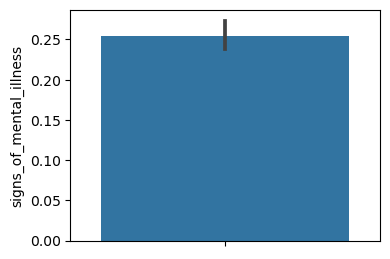

In [26]:
plt.figure(figsize = (4,3))
sns.barplot(data = df, y = 'signs_of_mental_illness');

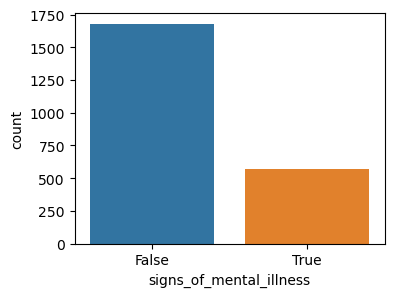

In [28]:
plt.figure(figsize = (4,3))
sns.countplot(data = df, x = 'signs_of_mental_illness')
plt.show()

## 5: Plot number of Threat Types

In [30]:
df['threat_level'].value_counts()

threat_level
attack          1462
other            677
undetermined     115
Name: count, dtype: int64

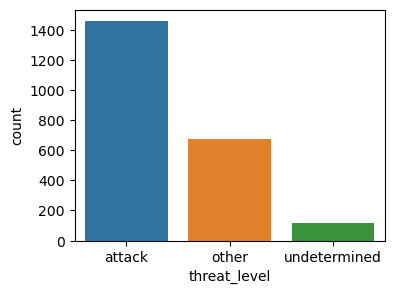

In [31]:
plt.figure(figsize = (4,3))
sns.countplot(data = df, x = 'threat_level');

## 6: Plot number of Flee Types

In [33]:
df['flee'].value_counts()

flee
Not fleeing    1528
Car             360
Foot            278
Other            88
Name: count, dtype: int64

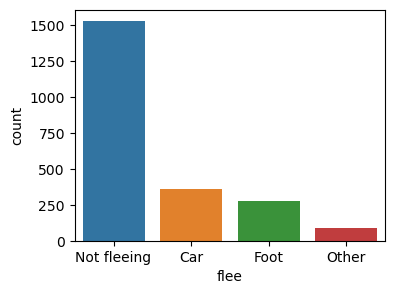

In [34]:
plt.figure(figsize = (4,3))
sns.countplot(data = df, x = 'flee');